In [3]:
import sys
from qutip_simulation_functions import *
import numpy as np
import qutip as qt

%matplotlib inline

In [4]:
g = qt.basis(2,0)
e = qt.basis(2,1)

psi0 = g

b = qt.destroy(2)

qubit_x = qt.sigmax()
qubit_y = qt.sigmay()
qubit_z = qt.sigmaz()
omega = 0.1 * np.ones(100)
tlist = np.linspace(0,100,100)

e_ops = [qubit_x, qubit_y, qubit_z]
c_ops = []

free_H = qt.Qobj([[0,0],[0,0]])

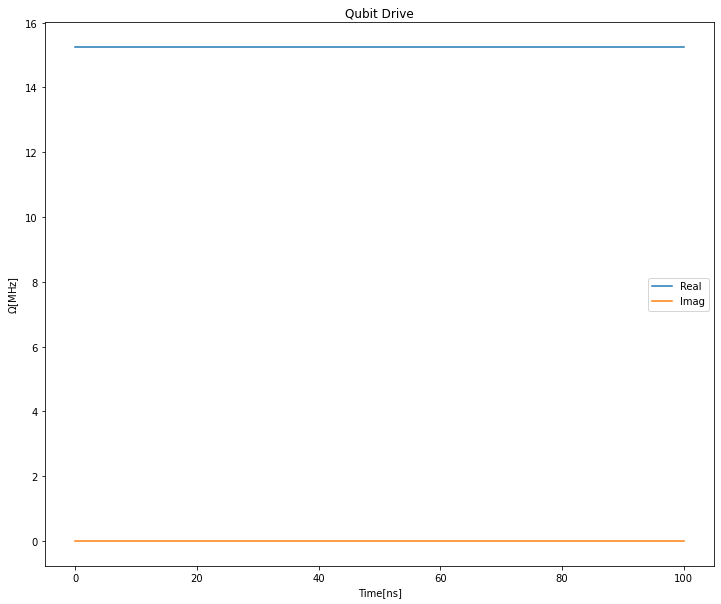

In [5]:
H_tot = driven_hamiltonian(omega=omega, free_hamiltonian=free_H, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)

In [6]:
res = qt.mesolve(H_tot,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))

In [7]:
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]

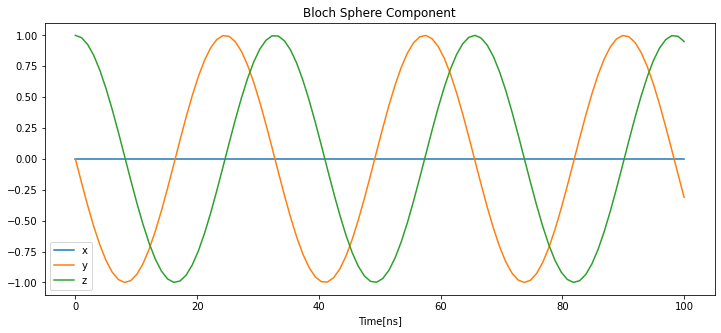

In [8]:
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)

In [9]:
def animate_bloch_test(vector_array, name="bloch.gif", fps_in=20):
    fig = plab.figure()
    ax = Axes3D(fig,azim=-40,elev=30)
    sphere = qt.Bloch(axes=ax)
    points = [vector_array[0],vector_array[1],vector_array[2]]

    def ani(i):
        sx, sy, sz = points
        sphere.clear()
        sphere.add_vectors([sx[i],sy[i],sz[i]])
        sphere.make_sphere()
        return ax

    def init():
        return ax

    ani = animation.FuncAnimation(fig, ani, np.arange(len(vector_array[0])), init_func=init, blit=False, repeat=False)
    ani.save(name, fps=fps_in)

C:\Users\user\AppData\Local\Temp\ipykernel_54248\3100939128.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,azim=-40,elev=30)


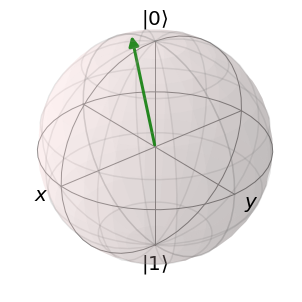

In [10]:
animate_bloch_test(vector_array = bvec_array)

In [11]:
import qctrlvisualizer as qvis

In [13]:
qvis.display_bloch_sphere_from_bloch_vectors(bvec_array)

<IPython.core.display.Javascript object>